## Assignment-1:prepare.ipynb
### **Tanmoy Paul**
### *Roll no- MDS202246*

### Importing dependences

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [2]:
data=pd.read_csv('emails.csv')
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


### Data Preprocessing & Data Cleaning

#### *Checking for duplicates and removing it.*

In [4]:
data.duplicated().sum()

33

So, there are 33 duplicates rows in the data.

In [5]:
data=data.drop_duplicates(keep="first").reset_index(drop=True) ## removing duplicates

## Text Preprocessing Step

In [6]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to C:\Users\TANMOY
[nltk_data]     PAUL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:

## Function to preprocess the text like- tokenize the text, removing the stop words, lowering the case, removing URLs etc .
def preprocess_text(text):
    # Step 1: Convert to lowercase
    text = text.lower()
    
    pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    # Step 2: replace matched URLs with an empty string
    text = re.sub(pattern, '', text)
    
    # Step 3: Remove hyperlinks
    text = re.sub(r'http\S+|www\S+|https\S+|\d+|[^A-Za-z\s]+', '', text)

    # Step 4: Tokenization
    tokens = word_tokenize(text)

    # Step 5: Remove Punctuation and Special Characters
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens]

    # Step 6: Remove Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Step 7: Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Step 8: Remove Numerical Values
    tokens = [token for token in tokens if not token.isdigit()]

    # Step 9: Remove Single Character Tokens
    tokens = [token for token in tokens if len(token) > 1]

    # Step 10: Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [8]:
data['Processed_text']=''
data['text']=data['text'].apply(str)
for i in data.index:
  data['Processed_text'][i]=preprocess_text(data.text[i])
  if i%1000==0:
    print(i)
print("preprocessing Completed!!")

0
1000
2000
3000
4000
5000
preprocessing Completed!!


In [9]:
data

,text,spam,Processed_text
0,Subject: naturally irresistible your corporate...,1,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,subject color print special request addit info...
4,"Subject: do not have money , get software cds ...",1,subject money get softwar cd softwar compat gr...
...,...,...,...
5690,Subject: re : research and development charges...,0,subject research develop charg gpg forward shi...
5691,"Subject: re : receipts from visit jim , than...",0,subject receipt visit jim thank invit visit ls...
5692,Subject: re : enron case study update wow ! a...,0,subject enron case studi updat wow day super t...
5693,"Subject: re : interest david , please , call...",0,subject interest david pleas call shirley cren...


### *Removing the "subject" word*

In [10]:
## Removing the word "subject" from the begining of the mails using regex expresion
for i in data.index:
  data['Processed_text'][i]=re.sub(r'^.*?subject','',data.Processed_text[i])
print("\"subject\" word removed")

"subject" word removed


In [11]:
data

,text,spam,Processed_text
0,Subject: naturally irresistible your corporate...,1,natur irresist corpor ident lt realli hard re...
1,Subject: the stock trading gunslinger fanny i...,1,stock trade gunsling fanni merril muzo colza ...
2,Subject: unbelievable new homes made easy im ...,1,unbeliev new home made easi im want show home...
3,Subject: 4 color printing special request add...,1,color print special request addit inform clic...
4,"Subject: do not have money , get software cds ...",1,money get softwar cd softwar compat great gro...
...,...,...,...
5690,Subject: re : research and development charges...,0,research develop charg gpg forward shirley cr...
5691,"Subject: re : receipts from visit jim , than...",0,receipt visit jim thank invit visit lsu shirl...
5692,Subject: re : enron case study update wow ! a...,0,enron case studi updat wow day super thank mu...
5693,"Subject: re : interest david , please , call...",0,interest david pleas call shirley crenshaw as...


### *Next we will check if spam mail are longer than non_spam mail or not.* (EDA)

In [12]:
## This function return the no of word in the given text
def no_of_word(text):
  tokens=nltk.word_tokenize(text)
  return(len(tokens))

In [13]:
data["Length"]=data["Processed_text"].apply(no_of_word)

In [14]:
data

,text,spam,Processed_text,Length
0,Subject: naturally irresistible your corporate...,1,natur irresist corpor ident lt realli hard re...,112
1,Subject: the stock trading gunslinger fanny i...,1,stock trade gunsling fanni merril muzo colza ...,63
2,Subject: unbelievable new homes made easy im ...,1,unbeliev new home made easi im want show home...,39
3,Subject: 4 color printing special request add...,1,color print special request addit inform clic...,43
4,"Subject: do not have money , get software cds ...",1,money get softwar cd softwar compat great gro...,18
...,...,...,...,...
5690,Subject: re : research and development charges...,0,research develop charg gpg forward shirley cr...,102
5691,"Subject: re : receipts from visit jim , than...",0,receipt visit jim thank invit visit lsu shirl...,111
5692,Subject: re : enron case study update wow ! a...,0,enron case studi updat wow day super thank mu...,182
5693,"Subject: re : interest david , please , call...",0,interest david pleas call shirley crenshaw as...,87


### *Distribution of Length grouped by spam column*

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

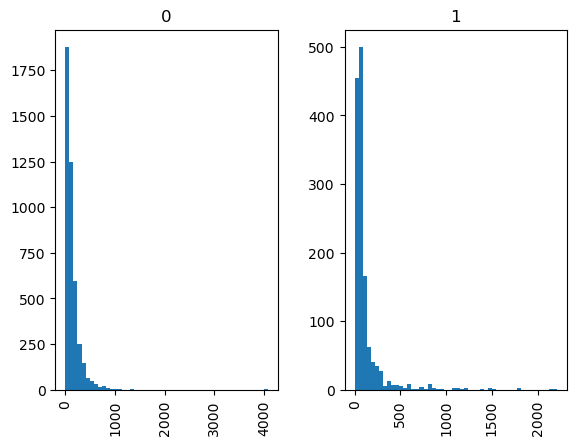

In [15]:
data.hist(column='Length', by='spam', bins=50)

### Stratified Split and Storing the data into train & test set 

In [16]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into train and test sets (stratified)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['spam'])

# Step 2: Storing the splits to CSV files
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

Here I have split the data set into train and test set because the the whole data set is quite small.To avoid wasting too much  training data in validation set, I will be using Cross-Validation: the training set is split into complementary subsets, and each model is trained against a different combination of these subsets and validated against the remaining parts. Once the model type and hyperparameters have been selected, a final model is trained using these hyperparameters on the full training set, and the generalized error is measured on the test set.

<function matplotlib.pyplot.show(close=None, block=None)>

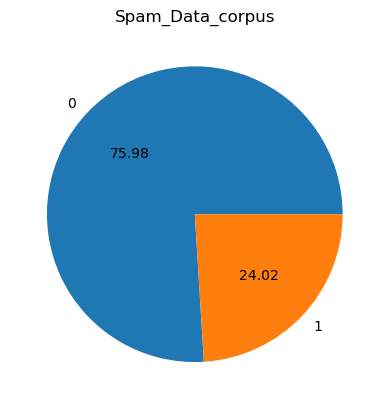

In [17]:
plt.pie(data['spam'].value_counts(),labels=["0","1"],autopct="%0.2f")
plt.title("Spam_Data_corpus")
plt.show

### Checking if the Train data distribution is same as the Test data distribution or not

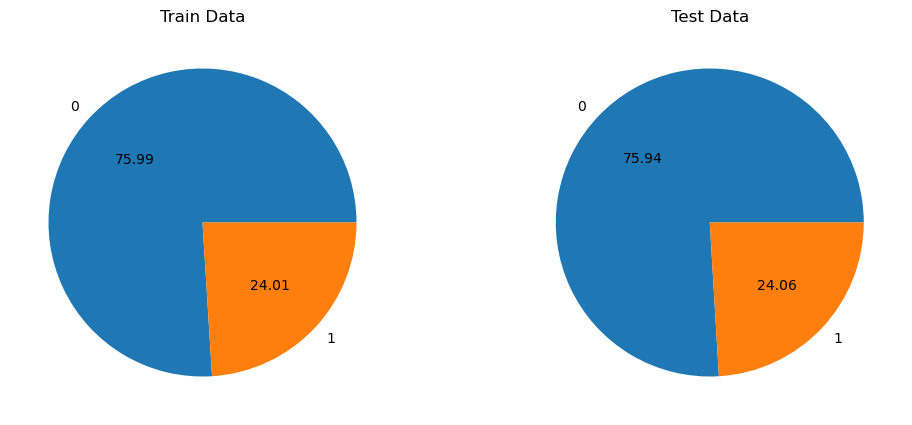

In [19]:
plt.figure(figsize=(12, 5))

# Plot for Train Data
plt.subplot(1, 2, 1)
plt.pie(train_data['spam'].value_counts(), labels=["0", "1"], autopct="%0.2f")
plt.title("Train Data")

# Plot for Test Data
plt.subplot(1, 2, 2)
plt.pie(test_data['spam'].value_counts(), labels=["0", "1"], autopct="%0.2f")
plt.title("Test Data")

plt.show()

### Assignment 2 Update:- DVC

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [10]:
# Load train.csv, test.csv, validation.csv
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Print distribution of target variable in train.csv
print("Distribution of target variable in train.csv:")
print(train_data['spam'].value_counts())
print()

# Print distribution of target variable in test.csv
print("Distribution of target variable in test.csv:")
print(test_data['spam'].value_counts())
print()

Distribution of target variable in train.csv:
0    3488
1    1094
Name: spam, dtype: int64

Distribution of target variable in test.csv:
0    872
1    274
Name: spam, dtype: int64



### Updated Train-Test splitting using random seed = 6:

In [4]:
## splitting
data=pd.read_csv('emails.csv')
train_data, test_data = train_test_split(data, test_size=0.2, random_state=6)

In [5]:
## Storing the splits to CSV files
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

In [6]:
# Load train.csv, test.csv, validation.csv
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Print distribution of target variable in train.csv
print("Distribution of target variable in train.csv:")
print(train_data['spam'].value_counts())
print()

# Print distribution of target variable in test.csv
print("Distribution of target variable in test.csv:")
print(test_data['spam'].value_counts())
print()

Distribution of target variable in train.csv:
0    3513
1    1069
Name: spam, dtype: int64

Distribution of target variable in test.csv:
0    847
1    299
Name: spam, dtype: int64



### Checkout the First version of train and Test

In [11]:
# Print distribution of target variable in train.csv
print("Distribution of target variable in train.csv:")
print(train_data['spam'].value_counts())
print()

# Print distribution of target variable in test.csv
print("Distribution of target variable in test.csv:")
print(test_data['spam'].value_counts())
print()

Distribution of target variable in train.csv:
0    3488
1    1094
Name: spam, dtype: int64

Distribution of target variable in test.csv:
0    872
1    274
Name: spam, dtype: int64

